**Testing**

To evaluate a pre-trained image classification model (face_touch_final_model.h5) by predicting and displaying results on 10 randomly selected test images from a structured dataset. The test dataset is organized into subdirectories where each folder represents a class. The script first loads the model and extracts class labels from the folder names. It then randomly selects an image from the test dataset, resizes it to 224x224 pixels, normalizes it, and feeds it into the model to predict its class. The actual class and the predicted class are displayed on top of each image using a matplotlib grid. The goal is to visually inspect the model's performance on unseen data and understand how accurately it classifies different categories in a real-world test scenario.

Data Loading and Extraction from Google Drive

In [1]:
# Import necessary libraries
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Mount Google Drive
from google.colab import drive
# drive.mount('/content/drive')

# Define the zip file path inside Google Drive
zip_path = "/content/MLDL_Data_Face.zip"

# Check if the file exists in Google Drive
if os.path.exists(zip_path):
    print("File found:", zip_path)
else:
    print("File not found! Please check the path and try again.")

# Define extraction directory
extract_dir = "/content/dataset"

# Extract the zip file
if os.path.exists(zip_path):
    print("Extracting files...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Extraction complete!")
else:
    print("Extraction skipped: Zip file not found.")

# Verify extracted files
if os.path.exists(extract_dir):
    print("Extracted files:", os.listdir(extract_dir))
else:
    print("Extraction failed or directory does not exist.")


File found: /content/MLDL_Data_Face.zip
Extracting files...
Extraction complete!
Extracted files: ['Project_1_2_']


Dataset Splitting into Train, Validation, and Test Sets

In [2]:
import os
import random
import shutil

# Define the paths for the original dataset and the new split directories
original_dataset_dir = '/content/dataset/Project_1_2_/originaldata'  # Path to the extracted data folder (ensure this points to the correct folder)
train_dir = '/content/dataset/train'  # Path for training images
valid_dir = '/content/dataset/validation'  # Path for validation images
test_dir = '/content/dataset/test'  # Path for testing images

# Create directories for the splits if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


# Iterate through each class directory in the original dataset and split the data
def split_data(original_dataset_dir, train_dir, valid_dir, test_dir, test_ratio=0.1, valid_ratio=0.1):
    # Get the list of class names (subdirectories) in the original dataset directory
    class_names = os.listdir(original_dataset_dir)

    for class_name in class_names:
        class_dir = os.path.join(original_dataset_dir, class_name)

        # Only proceed if it's a directory (to avoid non-class files)
        if not os.path.isdir(class_dir):
            continue

        # Get list of all image files in the current class directory
        image_files = os.listdir(class_dir)

        # Shuffle the image files randomly
        random.shuffle(image_files)

        # Calculate the number of files for each split
        num_files = len(image_files)
        num_test = int(num_files * test_ratio)
        num_valid = int(num_files * valid_ratio)
        num_train = num_files - num_test - num_valid

        # Split the images into training, validation, and testing
        train_files = image_files[:num_train]
        valid_files = image_files[num_train:num_train + num_valid]
        test_files = image_files[num_train + num_valid:]

        # Create class subdirectories in the splits
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(valid_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # Move the files to their respective directories
        for file in train_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(train_dir, class_name, file))

        for file in valid_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(valid_dir, class_name, file))

        for file in test_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(test_dir, class_name, file))

# Call the function to split the data into training, validation, and test sets
split_data(original_dataset_dir, train_dir, valid_dir, test_dir)

# Check the directory structure to ensure the split is done
print("Training directory structure:", os.listdir(train_dir))
print("Validation directory structure:", os.listdir(valid_dir))
print("Test directory structure:", os.listdir(test_dir))


Training directory structure: ['Class 2 No hands', 'Class 1 Touch', 'Class 3 No Touch w Hands']
Validation directory structure: ['Class 2 No hands', 'Class 1 Touch', 'Class 3 No Touch w Hands']
Test directory structure: ['Class 2 No hands', 'Class 1 Touch', 'Class 3 No Touch w Hands']


Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


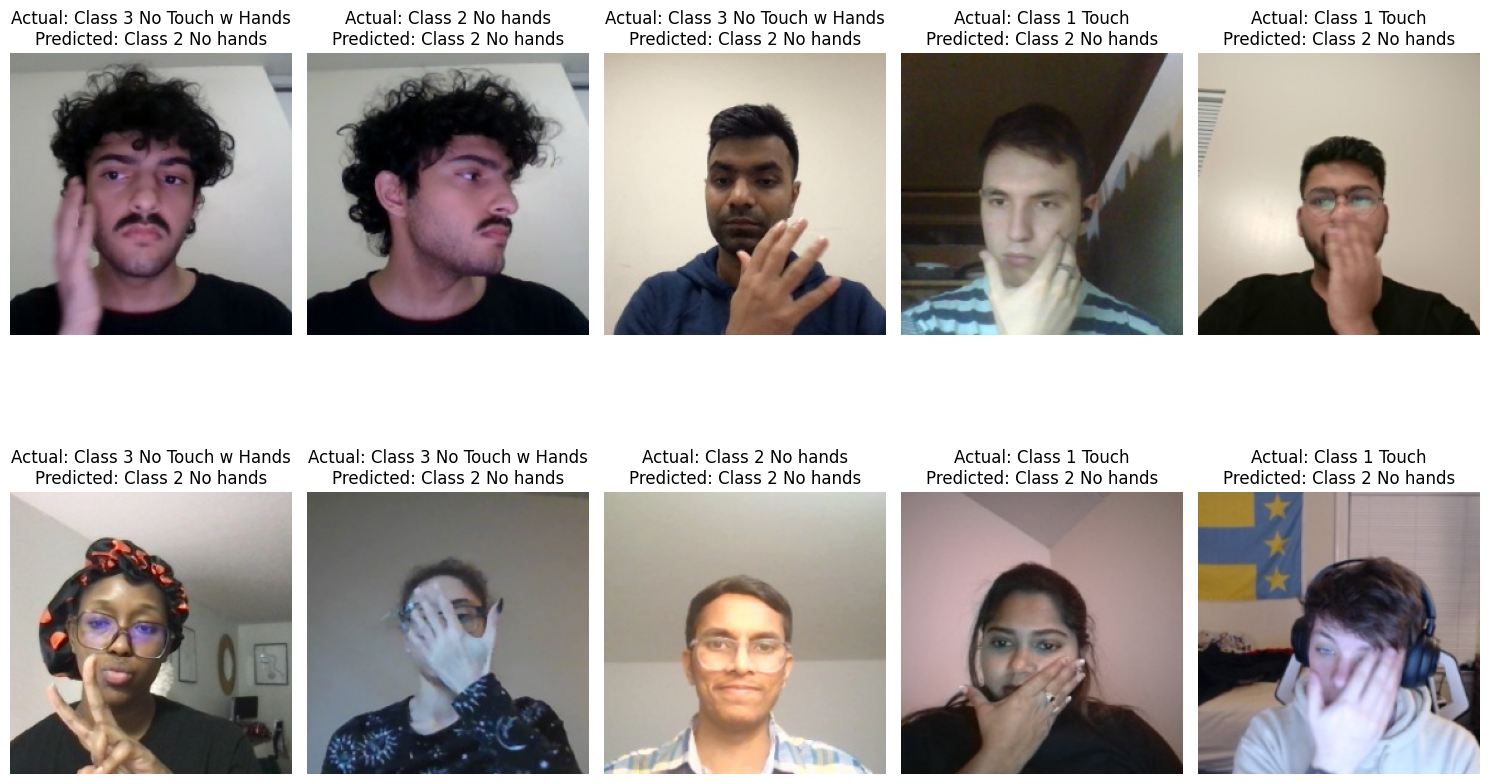

In [5]:
# Import necessary libraries
import os  # For file and directory operations
import random  # To select random items
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For displaying images
from tensorflow.keras.models import load_model  # To load pre-trained Keras model
from tensorflow.keras.preprocessing import image  # For image processing utilities

# Define the path to the trained model and test dataset
model_path = "/content/face_touch_final_model.h5"
test_dir = "/content/dataset/test"  # Make sure this directory contains subfolders for each class

# Load the trained model
model = load_model(model_path)

# Get class names from subdirectories in the test dataset
class_names = sorted(os.listdir(test_dir))  # Assumes each subfolder name is a class label

# Function to get a random image path and its corresponding class label from the test dataset
def get_random_test_image(test_dir):
    random_class = random.choice(os.listdir(test_dir))  # Pick a random class folder
    class_path = os.path.join(test_dir, random_class)

    random_image_name = random.choice(os.listdir(class_path))  # Pick a random image file
    random_image_path = os.path.join(class_path, random_image_name)

    return random_image_path, random_class

# Function to predict and display multiple random test images with actual and predicted labels
def predict_multiple_random_test_images(num_images=10):
    plt.figure(figsize=(15, 10))  # Set up a figure for plotting

    for i in range(num_images):
        # Get a random image and its true class
        img_path, actual_class = get_random_test_image(test_dir)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match model input
        img_array = image.img_to_array(img)  # Convert to array
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize and add batch dimension

        # Predict the class using the model
        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]  # Get the class with highest probability

        # Display the image and prediction result
        ax = plt.subplot(2, 5, i + 1)  # Create subplot (2 rows, 5 columns)
        ax.imshow(img)  # Show the image
        ax.axis("off")  # Hide axes
        ax.set_title(f"Actual: {actual_class}\nPredicted: {predicted_class}")  # Show labels

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()  # Display all the plots

# Run the prediction and visualization function
predict_multiple_random_test_images(num_images=10)